In this project, we will be going through data from matches played as Lands over a number the course of this year.

In [1]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# reading the csv's
table1 = pd.read_csv('D:\Lands\Lands_Data_Project_9.20\\t1.csv')
table2 = pd.read_csv('D:\Lands\Lands_Data_Project_9.20\\t2.csv')
table3 = pd.read_csv('D:\Lands\Lands_Data_Project_9.20\\t3.csv')
table4 = pd.read_csv('D:\Lands\Lands_Data_Project_9.20\\t4.csv')

# correcting column names & merging my own data
table2 = table2.rename(columns = {'Unnamed: 5': 'Play/Draw', 'Unnamed: 6': 'Wins', 'Unnamed: 7': 'Losses'})
df = table2.append(table1)
df = df.append(table4)

# renaming table3 data and merging it
new_row = {'jund lands': 'jund lands', 'maxtortion': 'maxtortion', 'red eldrazi': 'red eldrazi', 'Chalice': 'Chalice', 'draw': 'draw', '1': 1, '2': 2}
table3.append(new_row, ignore_index=True)
table3.columns = ['My Deck', 'Opponent', 'Opp Deck', 'Opp Category', 'Play/Draw', 'Wins', 'Losses']
df = df.merge(table3, how='outer')

# dropping irrelevant columns
df = df.drop(['Comment', 'Play/Draw', 'Play / Draw', 'Win Rate', 'Opponent'], axis=1)

# cleaning match wins column
df['Match Wins'] = df['Wins'].map(lambda x: 1 if x == 2 else 0)
df['Match Losses'] = df['Losses'].map(lambda x: 1 if x == 2 else 0)

# consolidating macro-archetypes
df['Opp Category'] = df['Opp Category'].map(lambda x: x.title())
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Show & Tell' if x == 'Show And Tell' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Brew/Other' if x == 'Unk' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Brew/Other' if x == 'Brew' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Dark Depths' if x == 'Lands' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Gyruda' if x == 'Gryruda' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Chalice' if x == 'Blood Moon' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Delver' if x == 'Death Shadow' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Combo-Control' if x == 'Combo Control' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'UW' if x == 'Uw' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: '3-4c Control' if x == '3-Color Control' else x)
df['Opp Category'] = df['Opp Category'].map(lambda x: 'Brew/Other' if x == 'Pox' or x == 'Jund' or x == 'Nic Fit' or x == 'Burn' or x == 'Painter' or x == 'Infect' or x == 'Gyruda' else x)
df.loc[df['Opp Deck'].str.contains('doomsday'), 'Opp Category']='Doomsday'
df.loc[df['Opp Deck'].str.contains('Doomsday'), 'Opp Category']='Doomsday'
df.loc[df['Opp Deck'].str.contains('Rip Helm'), 'Opp Category']='Combo-Control'
df.loc[df['Opp Deck'].str.contains('Dragon'), 'Opp Category']='Combo-Control'

# this creates a chart that focuses on opposing categories for seeing winrates
cat_sums = pd.DataFrame(df.groupby('Opp Category').sum()).reset_index()
cat_sums['Total Matches'] = cat_sums['Match Wins'] + cat_sums['Match Losses']
cat_sums['Meta Share'] = cat_sums['Total Matches'] / len(df) * 100
cat_sums['Share Rounded'] = cat_sums['Meta Share'].round()
cat_sums['Share Rounded'] = cat_sums['Share Rounded'].astype(int).astype(str)
cat_sums['Opp Category Label'] = cat_sums['Opp Category'] + '\n' + (cat_sums['Share Rounded']) + '% Meta Share'
cat_sums['Win Rate'] = cat_sums['Match Wins'] / cat_sums['Total Matches'] * 100
cat_sums = cat_sums.sort_values('Meta Share', ascending=False)

This data enables us to graph our winrate against different opponent categories.

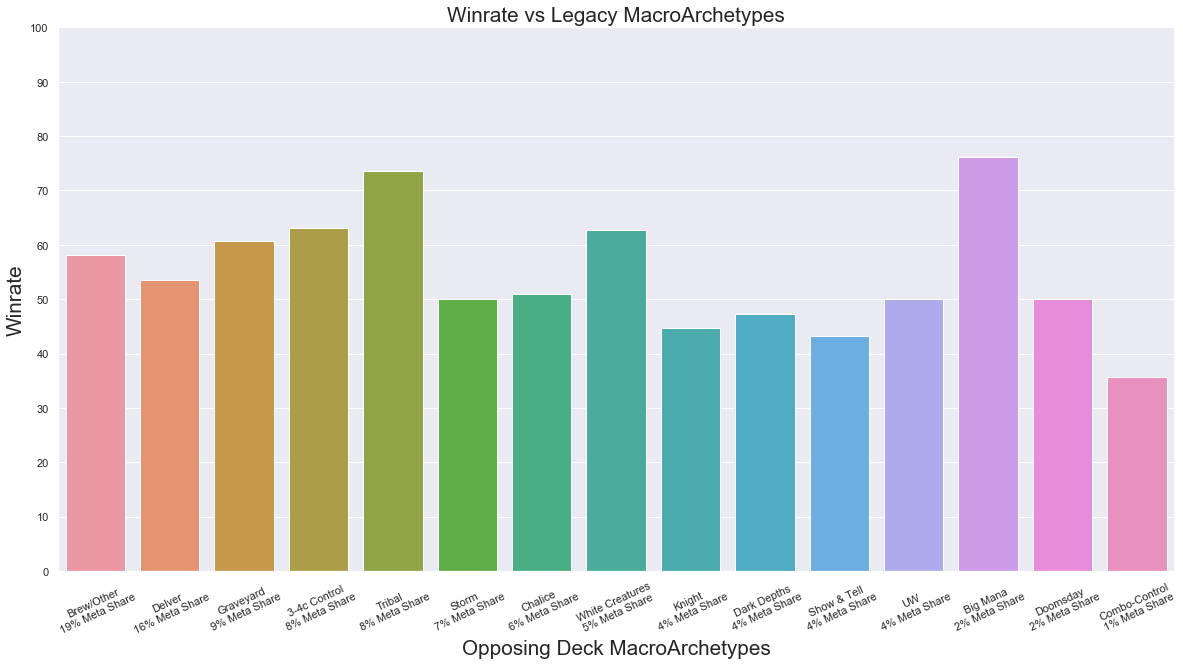

In [22]:
# making a graph of winrate against macro-archetype
deck_share_order = list(cat_sums.groupby('Opp Category Label').sum()['Meta Share'].sort_values(ascending=False).index)
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20,10)) 
ax = sns.barplot(x='Opp Category Label', y='Win Rate', data=cat_sums)
ax.set_xlabel('Opposing Deck MacroArchetypes', fontsize='xx-large')
ax.set_ylabel('Winrate', fontsize='xx-large')
ax.set_xticklabels(deck_share_order, rotation=25)
ax.set_title('Winrate vs Legacy MacroArchetypes', fontsize='xx-large')
ax.set_yticks(np.arange(0, 101, 10))

Now with the data more or less cleaned, we can start to arrange it. What we have right now was sufficient for a matchup winrate graph. But for a graph of winrate by Lands macrotype, we will need to organize the decks into macrotype.

In [3]:
# consolidating Lands version names
df['My Deck'] = df['My Deck'].map(lambda x: x.title().strip())
df['My Deck'] = df['My Deck'].map(lambda x: 'RG Lands' if x == 'Rg Lands' else x)
df['My Deck'] = df['My Deck'].map(lambda x: 'UG Lands' if x == 'Ug Lands' else x)
df['My Deck'] = df['My Deck'].map(lambda x: 'RUG Lands' if x == 'Rug Lands' or x == 'Rug Uro Lands' else x)
df['My Deck'] = df['My Deck'].map(lambda x: 'UG Lands' if x == 'Ug Uro Lands' else x)
df['My Deck'] = df['My Deck'].map(lambda x: 'UG Lands' if x == 'Ug Uro' else x)
df['My Deck'] = df['My Deck'].map(lambda x: 'UG Lands' if x == 'Uro Lands' or x == 'Giant Lands' or x == 'Uro Prison Lands' else x)
df['My Deck'] = df['My Deck'].map(lambda x: 'BG Lands' if x == 'Bg Lands' else x)
df['My Deck'] = df['My Deck'].map(lambda x: 'BUG Lands' if x == 'Bug Lands' else x)
df['My Deck'] = df['My Deck'].map(lambda x: 'Naya Lands' if x == "Naya Sevinne'S Lands" else x)
df['My Deck'] = df['My Deck'].map(lambda x: 'Karn Lands' if x == 'Karn Intuition Lands' else x)

# consolidation into Land macro-type
macro_dict = {'RG Lands': 'RG Lands', 'Jund Lands': 'Jund Lands', 'BUG Lands': 'BUG Lands', 'BG Lands': 'BG Lands', 
            'Horny Lands': 'Experimental', 'UG Stifle Lands': 'UG Lands', 'Dune Lands': 'RG Lands', 'Daze Lands': 'Experimental', 
             'Junk Lands': 'Experimental', 'Dark Queen Lands': 'BG Lands', 'RUG Lands': 'RUG Lands', 'Naya Lands': 'Experimental',
            'UG Lands': 'UG Lands', 'Karn Lands': 'Experimental', 'Lurrus Jund': 'Jund Lands', 'Reclaimer Lands': 'RG Lands',
            'Reanimator Lands': 'Experimental', 'Landshark': 'Experimental'}
df['Lands Macrotype'] = df['My Deck'].map(macro_dict)

# a dataframe of macrotype info
by_type = df.groupby(df['Lands Macrotype']).sum().reset_index()
by_type['Total Matches'] = by_type['Match Losses'] + by_type['Match Wins']
by_type['Win Rate'] = by_type['Match Wins'] / by_type['Total Matches'] * 100

# generating a dictionary of winrates for each macro-type
winrate_dict = {}
winrate_dict['Overall'] = df['Match Wins'].sum() / len(df) * 100
# not needed - winrate_dict['Overall Adjusted'] = by_type.drop([2, 0, 5])['Match Wins'].sum() / by_type.drop([2, 0, 5])['Total Matches'].sum() * 100
macro_winrate_df = pd.DataFrame(df.groupby(df['Lands Macrotype']).sum()['Match Wins'].reset_index())
index = 0
for entry in macro_winrate_df['Lands Macrotype']:
    winrate_dict[macro_winrate_df.iloc[index]['Lands Macrotype']] = (macro_winrate_df.iloc[index]['Match Wins'] / len(df.loc[df['Lands Macrotype'] == macro_winrate_df.iloc[index]['Lands Macrotype']])) * 100
    index += 1

# a dataframe of macrotype info
by_type = df.groupby(df['Lands Macrotype']).sum().reset_index()
by_type['Total Matches'] = by_type['Match Losses'] + by_type['Match Wins']
by_type['Win Rate'] = by_type['Match Wins'] / by_type['Total Matches'] * 100

With this organized, we can create a graph of winrates for each macrotype. Note that for some, data is quite limited, which could lead to unreliable success rates.

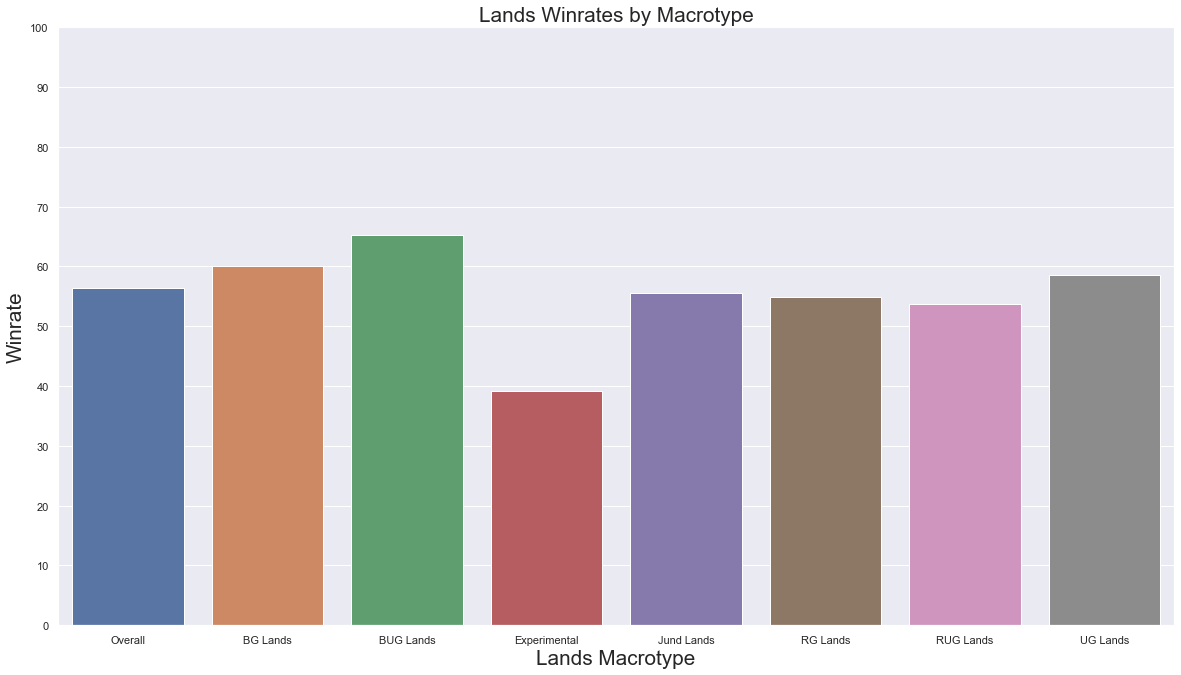

In [4]:
# making a graph of winrate by Lands macro-type
winrate_dict
sns.set(style='darkgrid')

fig, ax = plt.subplots(figsize=(20,11)) 
ax = sns.barplot(x=list(winrate_dict.keys()), y=list(winrate_dict.values()))
ax.set_xlabel('Lands Macrotype', fontsize='xx-large')
ax.set_ylabel('Winrate', fontsize='xx-large')
ax.set_xticklabels(list(winrate_dict.keys()))
ax.set_title('Lands Winrates by Macrotype', fontsize='xx-large')
ax.set_yticks(np.arange(0, 101, 10))   

Now we want to look at specific matchups within opponent deck categories. Specifically, we will look at delver, storm, control, tribal, and depths decks.

In [5]:
# now we want to investigate specific opponent types in greater detail
# so we break out certain opponent categories into their own dataframes
delver = df.loc[df['Opp Category'] == 'Delver'].copy()
storm = df.loc[df['Opp Category'] == 'Storm'].copy()
control = df.loc[(df['Opp Category'] == '3-4c Control') | (df['Opp Category'] == 'UW') | (df['Opp Category'] == 'Combo-Control')].copy()
depths = df.loc[df['Opp Category'] == 'Dark Depths'].copy()
tribal = df.loc[df['Opp Category'] == 'Tribal'].copy()


# it now becomes necessary to clean up each opponent category to avoid duplicates and miscategorization
# delver consolidation
delver['Opp Deck'] = delver['Opp Deck'].map(lambda x: 'RUG Delver' if x == 'Rug Delver' else x)
delver['Opp Deck'] = delver['Opp Deck'].map(lambda x: "Death's Shadow" if x == 'UB Shadow' or x == "death's shadow" or x == "UB Delver" else x)
delver['Opp Deck'] = delver['Opp Deck'].map(lambda x: "UR Delver" if x == "ur delver" else x)
delver['Opp Deck'] = delver['Opp Deck'].map(lambda x: "RUG Delver" if x == "rug delver" else x)
delver['Opp Deck'] = delver['Opp Deck'].map(lambda x: "Grixis Delver" if x == "grixis delver" else x)
delver['Opp Deck'] = delver['Opp Deck'].map(lambda x: "BUG Delver" if x == "bug delver" else x)
delver['Opp Deck'] = delver['Opp Deck'].map(lambda x: "Grixis Delver" if x == "grixis delver" else x)

# this still leaves us with a lot of subtypes, and some are so rare that our data on them is irrelevant. So we group those
delver['Opp Deck'] = delver['Opp Deck'].map(lambda x: "Delver - Other" if x == "4c Delver" or x == 'Mono U Delver' or x == 'Esper Delver' or x == 'Jeskai Delver' else x)

We're ready to build a graph of the delver matchup!

Text(0, 0.5, 'Winrate')

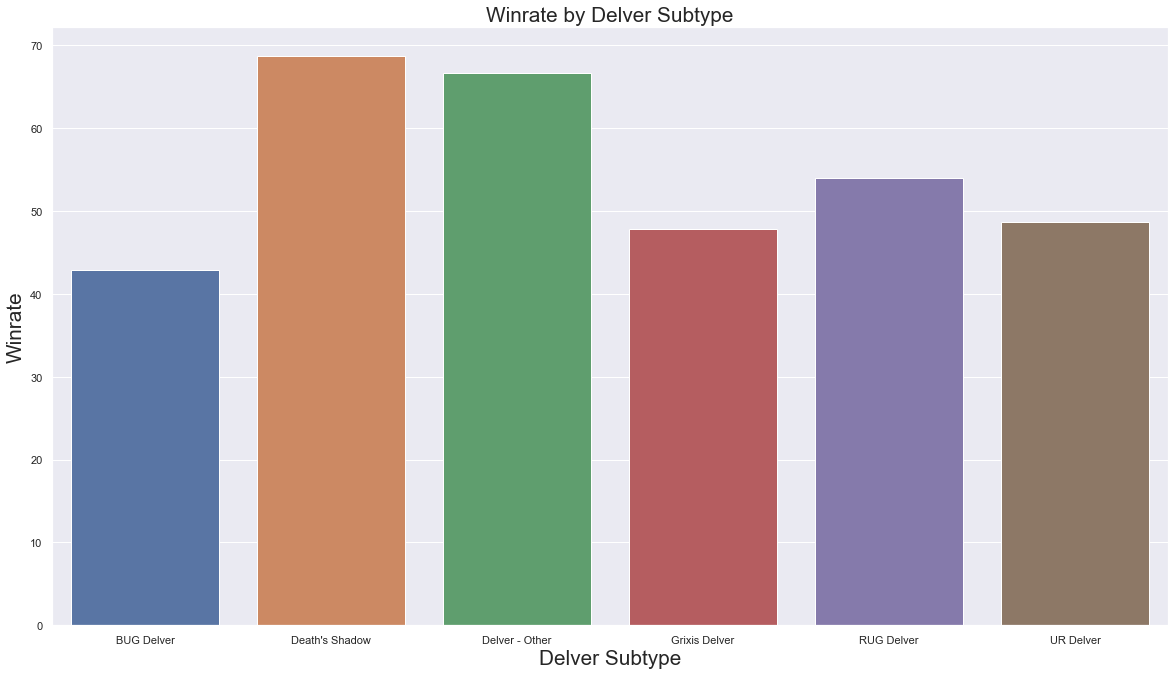

In [6]:
# a graph of winrate vs Delver subtypes
delver_by_type = pd.DataFrame(delver.groupby('Opp Deck').mean().reset_index())
delver_by_type['Match Wins'] = delver_by_type['Match Wins'] * 100
delver_by_type_small = delver_by_type.drop(['ID', 'Losses', 'Tot. Matches', 'Wins', 'Match Losses'], axis=1)
sns.set(style='darkgrid')

fig, ax = plt.subplots(figsize=(20,11))
ax = sns.barplot(x='Opp Deck', y='Match Wins', data=delver_by_type_small)
ax.set_title('Winrate by Delver Subtype', size='xx-large')
ax.set_xlabel('Delver Subtype', size='xx-large')
ax.set_ylabel('Winrate', size='xx-large')

We repeat the same cleaning process for each of the other categories we're interested in:

In [7]:
# storm cleanup
storm['Opp Deck'] = storm['Opp Deck'].map(lambda x: "TES" if x == "tes" else x)
storm['Opp Deck'] = storm['Opp Deck'].map(lambda x: "ANT" if x == "ant" else x)
storm['Opp Deck'] = storm['Opp Deck'].map(lambda x: "Belcher" if x == "charbelcher" else x)
storm['Opp Deck'] = storm['Opp Deck'].map(lambda x: "Storm - Other" if x.title() == "Echo Storm" or x == 'Oops' or x == 'Spanish Inquisition' else x)

# control cleanup
control['Opp Deck'] = control['Opp Deck'].map(lambda x: x.title().strip())
control['Opp Deck'] = control['Opp Deck'].map(lambda x: 'BUG Control' if x == 'Bug Control' else x)
control['Opp Deck'] = control['Opp Deck'].map(lambda x: 'Snowko' if x == 'Yorion 4C Control' else x)
control['Opp Deck'] = control['Opp Deck'].map(lambda x: 'BUG Control' if x == 'Shardless Bug' or x == 'Bug Oko Zenith' else x)
control['Opp Deck'] = control['Opp Deck'].map(lambda x: 'BUG Control' if x == 'Bug Control' else x)
control['Opp Deck'] = control['Opp Deck'].map(lambda x: 'Snowko' if x == '4C Control' else x)
control['Opp Deck'] = control['Opp Deck'].map(lambda x: 'UWx' if x == 'Uwx Stoneblade' or x == 'Uwx Control' or x == 'Standstill' else x)
control['Opp Deck'] = control['Opp Deck'].map(lambda x: 'Control - Other' if x == 'Grixis Control' or x == 'Rug Control' else x)
control['Opp Deck'] = control['Opp Deck'].map(lambda x: 'Combo-Control' if x in ['Food Chain', 'Aluren', 'Dragon', 'Rip Helm', 'Splinter Twin'] else x)

# depths cleanup
depths['Opp Deck'] = depths['Opp Deck'].map(lambda x: x.title().strip())
depths['Opp Deck'] = depths['Opp Deck'].map(lambda x: 'Lands' if set('ands').issubset(x) else x)
depths['Opp Deck'] = depths['Opp Deck'].map(lambda x: 'Slow Depths' if x == 'Gw Depths' or x == 'Lurrus Depths' else x)

# tribal cleanup
tribal['Opp Deck'] = tribal['Opp Deck'].map(lambda x: x.title().strip())
tribal = tribal.drop(index=193) #drop the elementals data, since there is only one deck and it does not fit into another category



And then the graphs for each archetype:

Text(0, 0.5, 'Winrate')

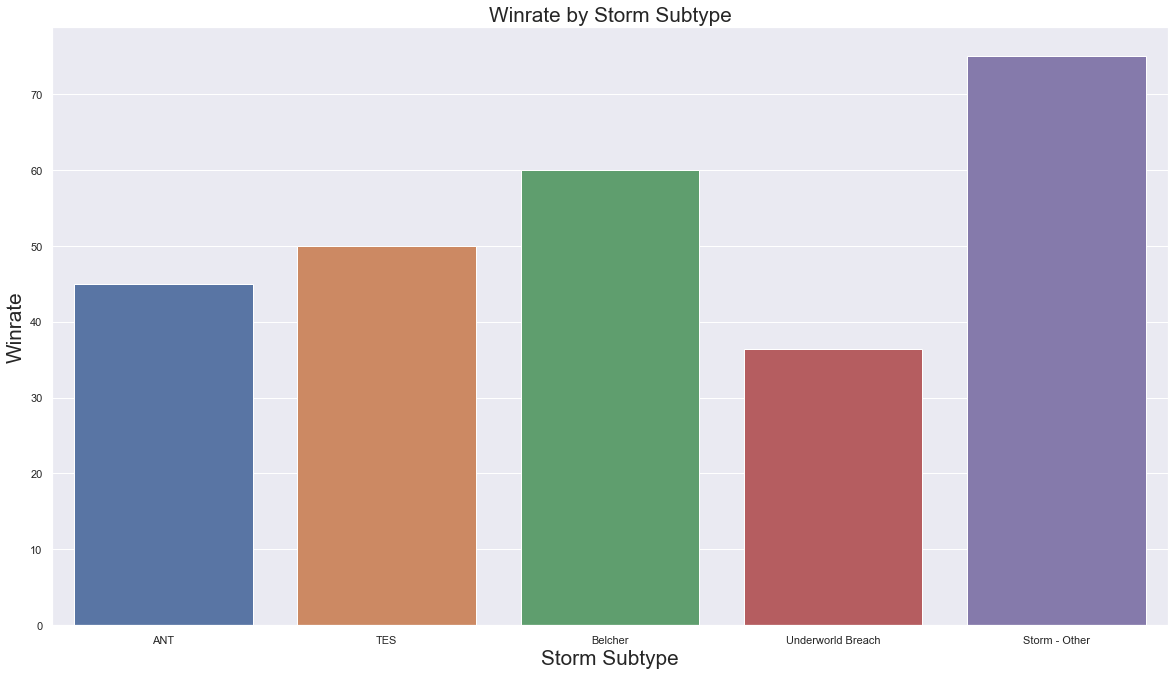

In [8]:
# storm graph
storm_by_type = pd.DataFrame(storm.groupby('Opp Deck').mean().reset_index())
storm_by_type['Match Wins'] = storm_by_type['Match Wins'] * 100
storm_by_type_small = storm_by_type.drop(['ID', 'Losses', 'Tot. Matches', 'Wins', 'Match Losses'], axis=1)

sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20,11))
ax = sns.barplot(x='Opp Deck', y='Match Wins', data=storm_by_type_small, order=['ANT', 'TES', 'Belcher', 'Underworld Breach', 'Storm - Other'])
ax.set_title('Winrate by Storm Subtype', size='xx-large')
ax.set_xlabel('Storm Subtype', size='xx-large')
ax.set_ylabel('Winrate', size='xx-large')

Text(0, 0.5, 'Winrate')

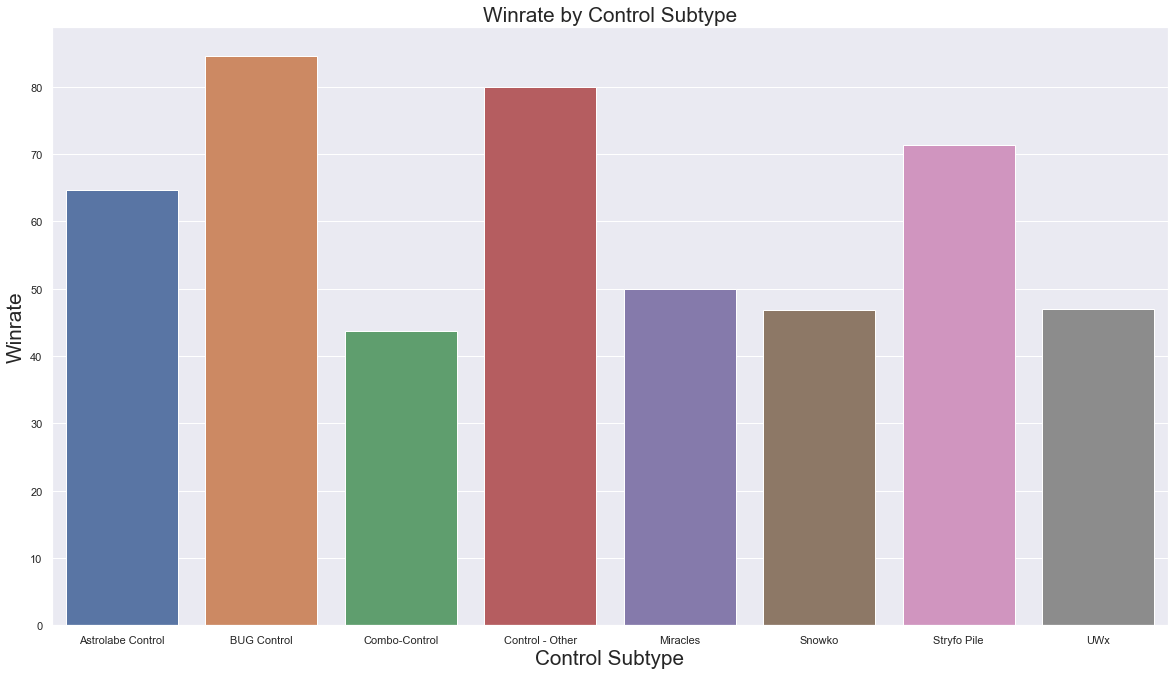

In [9]:
# control graph
control_by_type = pd.DataFrame(control.groupby('Opp Deck').mean().reset_index())
control_by_type['Match Wins'] = control_by_type['Match Wins'] * 100
control_by_type_small = control_by_type.drop(['ID', 'Losses', 'Tot. Matches', 'Wins', 'Match Losses'], axis=1)

sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20,11))
ax = sns.barplot(x='Opp Deck', y='Match Wins', data=control_by_type_small)
ax.set_title('Winrate by Control Subtype', size='xx-large')
ax.set_xlabel('Control Subtype', size='xx-large')
ax.set_ylabel('Winrate', size='xx-large')

Text(0, 0.5, 'Winrate')

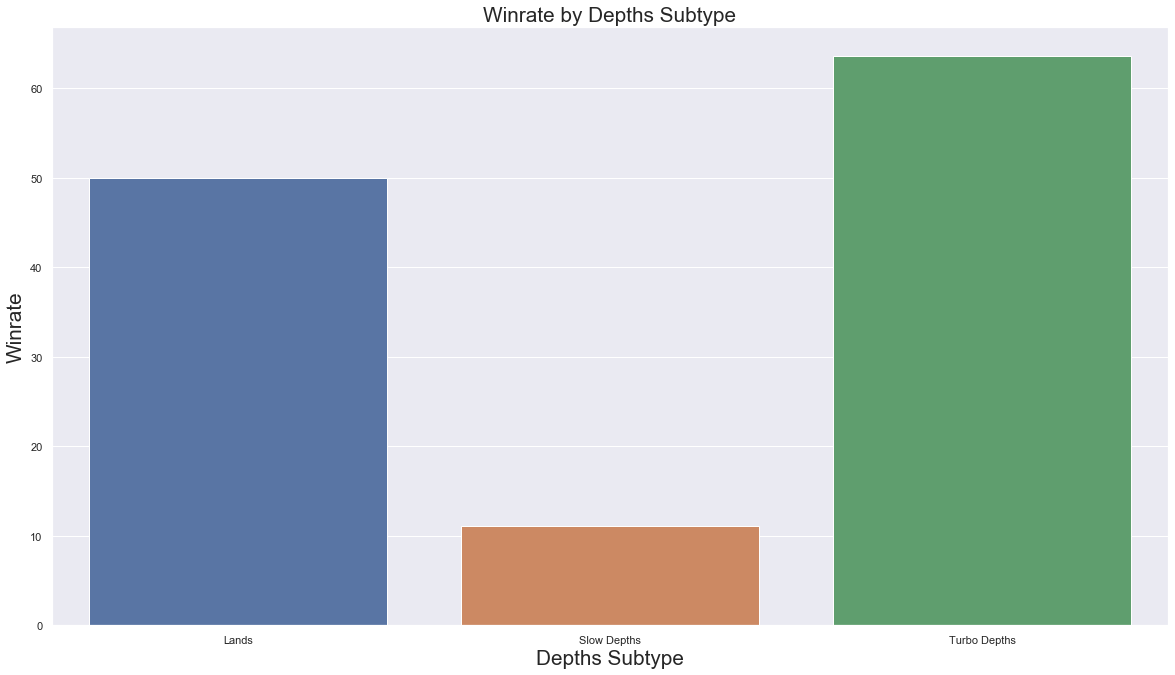

In [10]:
# depths graph
depths_by_type = pd.DataFrame(depths.groupby('Opp Deck').mean().reset_index())
depths_by_type['Match Wins'] = depths_by_type['Match Wins'] * 100
depths_by_type_small = depths_by_type.drop(['ID', 'Losses', 'Tot. Matches', 'Wins', 'Match Losses'], axis=1)

sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20,11))
ax = sns.barplot(x='Opp Deck', y='Match Wins', data=depths_by_type_small)
ax.set_title('Winrate by Depths Subtype', size='xx-large')
ax.set_xlabel('Depths Subtype', size='xx-large')
ax.set_ylabel('Winrate', size='xx-large')

Text(0, 0.5, 'Winrate')

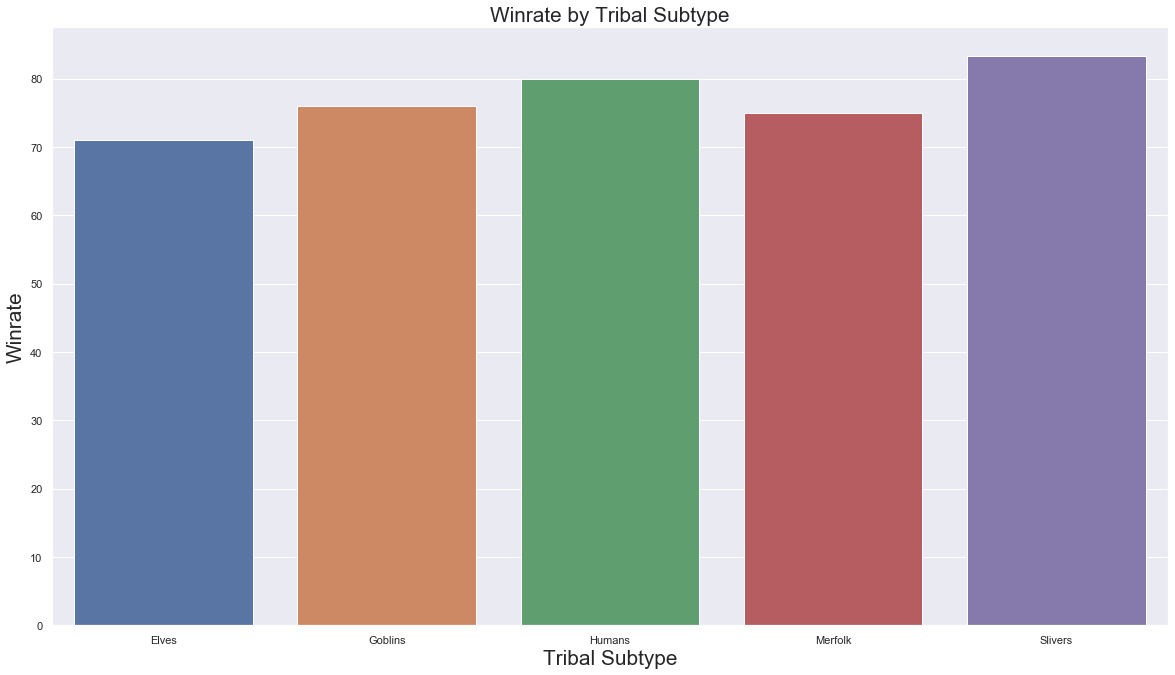

In [11]:
# tribal graph
tribal_by_type = pd.DataFrame(tribal.groupby('Opp Deck').mean().reset_index())
tribal_by_type['Match Wins'] = tribal_by_type['Match Wins'] * 100
tribal_by_type_small = tribal_by_type.drop(['ID', 'Losses', 'Tot. Matches', 'Wins', 'Match Losses'], axis=1)

sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20,11))
ax = sns.barplot(x='Opp Deck', y='Match Wins', data=tribal_by_type_small)
ax.set_title('Winrate by Tribal Subtype', size='xx-large')
ax.set_xlabel('Tribal Subtype', size='xx-large')
ax.set_ylabel('Winrate', size='xx-large')

In [12]:
df.to_csv('Lands_Data.csv')